In [1]:
# Importing the libraries
from DBN import DBN
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

In [2]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

In [3]:
mnist_data.data = (mnist_data.data.type(torch.FloatTensor)/255).bernoulli()

The number shown is the number: 2


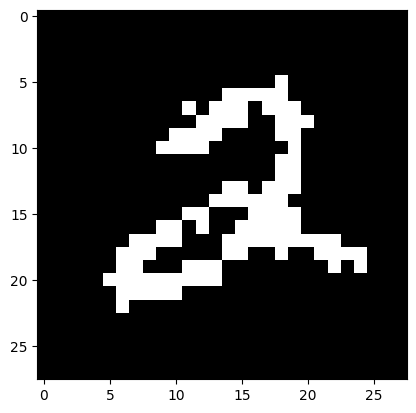

In [4]:
#Lets us visualize a number from the data set
idx = 5
img = mnist_data.data[idx]
print("The number shown is the number: {}".format(mnist_data.targets[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [5]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
dbn_mnist = DBN(visible_units=28*28 ,
                hidden_units=[23*23 ,18*18] ,
                k = 5,
                learning_rate = 0.01,
                learning_rate_decay = True,
                xavier_init = True,
                increase_to_cd_k = False,
                use_gpu = False)

In [6]:
num_epochs = 1
batch_size = 10

dbn_mnist.train_static(mnist_data.train_data,mnist_data.train_labels,num_epochs , batch_size)

/home/huzuntao/PycharmProjects/DBN-AE/venv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/huzuntao/PycharmProjects/DBN-AE/venv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


--------------------
Training the 1 st rbm layer
RBM fitting: 6000it [00:33, 179.82it/s]
Epoch:1 ,avg_cost = 0.5683597922325134 ,std_cost = 0.1101972758769989 ,avg_grad = 12010.3974609375 ,std_grad = 2014.2987060546875
--------------------
Training the 2 st rbm layer
RBM fitting: 6000it [00:23, 259.30it/s]
Epoch:1 ,avg_cost = 1.564089059829712 ,std_cost = 0.16886895895004272 ,avg_grad = 11844.4052734375 ,std_grad = 535.8290405273438


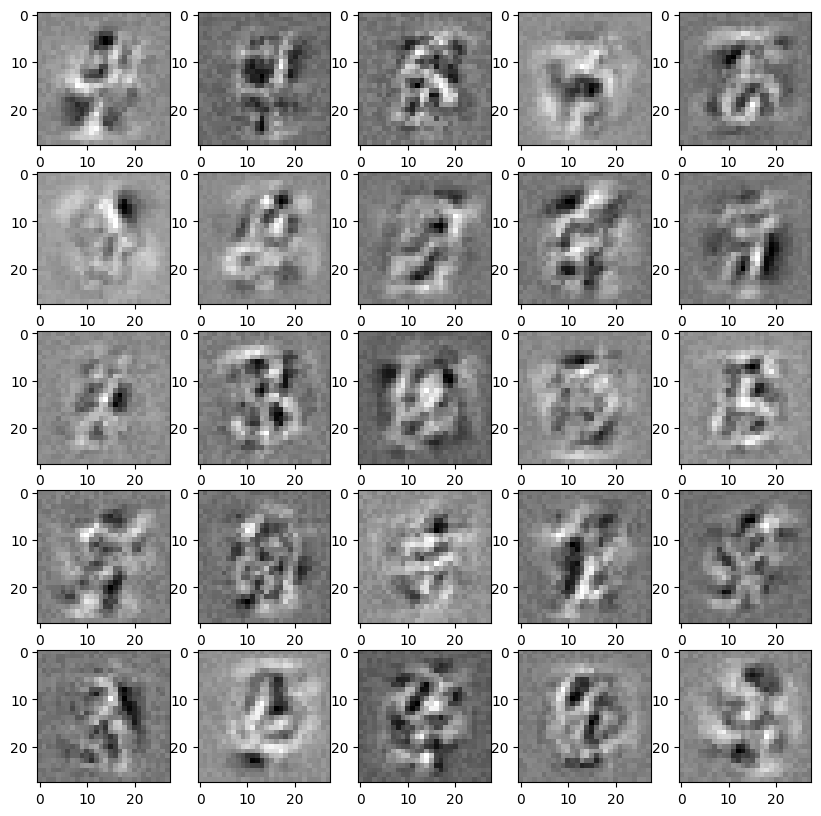

In [7]:
# visualising layer 1
learned_weights = dbn_mnist.rbm_layers[0].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

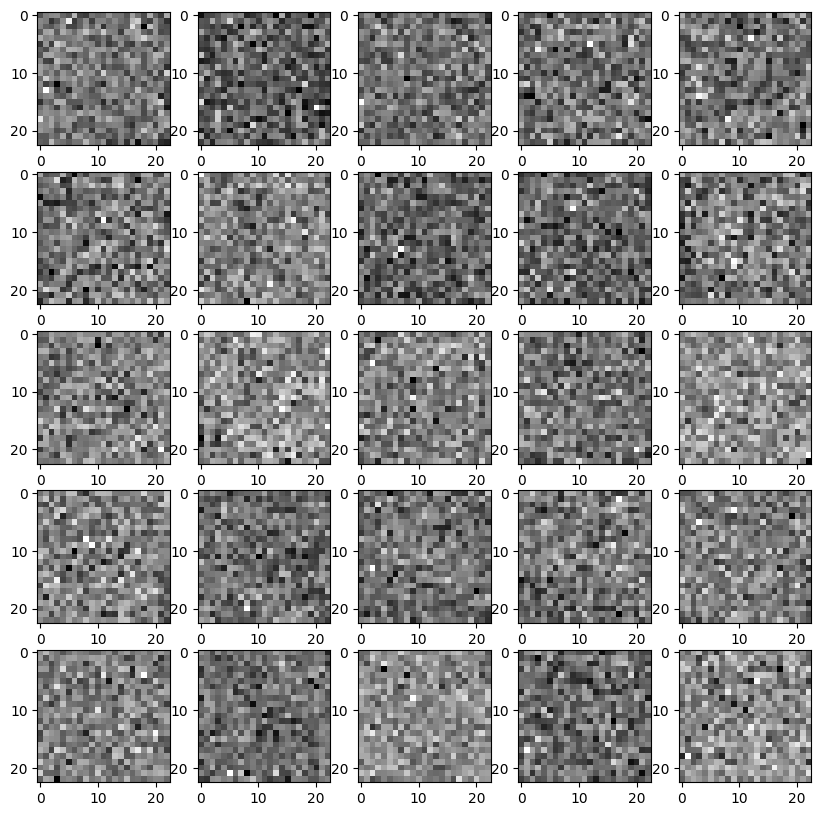

In [8]:
# visualising layer 2
learned_weights = dbn_mnist.rbm_layers[1].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((23,23)), cmap=plt.cm.gray)
plt.show()

In [9]:
number = 5 #A number between 0 and 10.

particular_mnist = []

limit = mnist_data.data.shape[0]
# limit = 60000
for i in range(limit):
    if(mnist_data.targets[i] == number):
        particular_mnist.append(mnist_data.data[i].numpy())
# particular_mnist = np.array(particular_mnist)
len(particular_mnist)
# mnist_data.train_data

5421

In [10]:
train_data = torch.stack([torch.Tensor(i) for i in particular_mnist])
train_label = torch.stack([torch.Tensor(number) for i in range(len(particular_mnist))])

In [11]:
dbn_mnist.train_static(train_data,train_label,20 , batch_size)

--------------------
Training the 1 st rbm layer
RBM fitting: 542it [00:02, 201.03it/s]
Epoch:1 ,avg_cost = 0.5141692757606506 ,std_cost = 0.04348492994904518 ,avg_grad = 10745.5439453125 ,std_grad = 531.3333129882812
RBM fitting: 542it [00:02, 221.05it/s]
Epoch:2 ,avg_cost = 0.4874814748764038 ,std_cost = 0.04232927784323692 ,avg_grad = 10552.2197265625 ,std_grad = 513.2303466796875
RBM fitting: 542it [00:02, 226.85it/s]
Epoch:3 ,avg_cost = 0.47849491238594055 ,std_cost = 0.04068591445684433 ,avg_grad = 10553.630859375 ,std_grad = 518.5215454101562
RBM fitting: 542it [00:02, 227.29it/s]
Epoch:4 ,avg_cost = 0.47163286805152893 ,std_cost = 0.041344840079545975 ,avg_grad = 10560.70703125 ,std_grad = 512.366455078125
RBM fitting: 542it [00:02, 228.34it/s]
Epoch:5 ,avg_cost = 0.47041210532188416 ,std_cost = 0.04050568491220474 ,avg_grad = 10591.3212890625 ,std_grad = 531.8421020507812
RBM fitting: 542it [00:02, 226.50it/s]
Epoch:6 ,avg_cost = 0.46763232350349426 ,std_cost = 0.0404867865145

The original number: 1


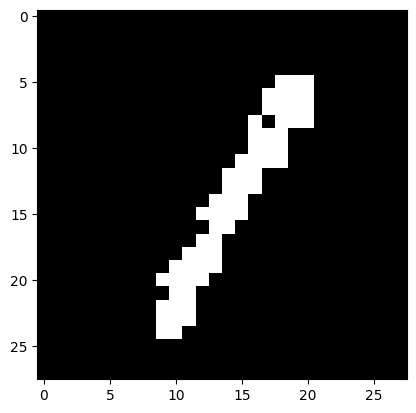

The reconstructed image


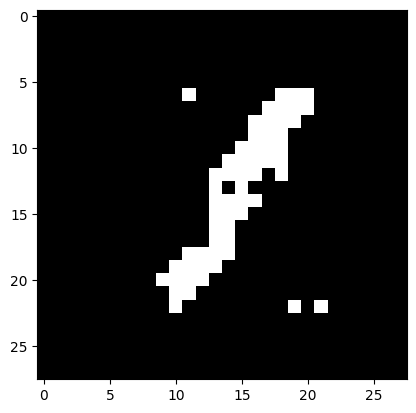

In [12]:
idx = 3
img = mnist_data.train_data[idx]
reconstructed_img = img.view(1,-1).type(torch.FloatTensor)

_,reconstructed_img= dbn_mnist.reconstruct(reconstructed_img)

reconstructed_img = reconstructed_img.view((28,28))
print("The original number: {}".format(mnist_data.train_labels[idx]))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()